## Import Modules

In [1]:
import os
import csv
import nibabel as nib

import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt

from tqdm import trange

## Define parameters and variables

In [2]:
# hyper parameters
EPOCH = 20
BATCH_SIZE = 128
LR = 0.001

In [3]:
# global variables
LABELS = ['CN', 'MCI', 'AD']
CLASSES = len(LABELS)

## Load data

In [4]:
mri_data_path = '/mri_data/ADNI_RESIZED/'
csv_data_path = 'structured_data_mac.csv'

# csv = [Image Data ID, Subject, Group, Sex, Age, Visit, Modality, Description, Type, Acq Date, Format, Downloaded, Image Path]
csv_data = []
with open(csv_data_path, newline = '', encoding = 'utf-8') as csvfile:
    csv_data = list(csv.reader(csvfile))[1 : ]

# data_list = [nib.load('./mri_data/' + csv_data[i][12]).get_fdata() for i in range(len(csv_data))]
data_list = []
for i in trange(len(csv_data)):
    data_list.append(nib.load('./mri_data/' + csv_data[i][12]).get_fdata())
    
label_list = [LABELS.index(csv_data[i][2]) for i in range(len(csv_data))]

100%|██████████| 3184/3184 [00:55<00:00, 56.95it/s]


In [5]:
data_list = np.array(data_list)

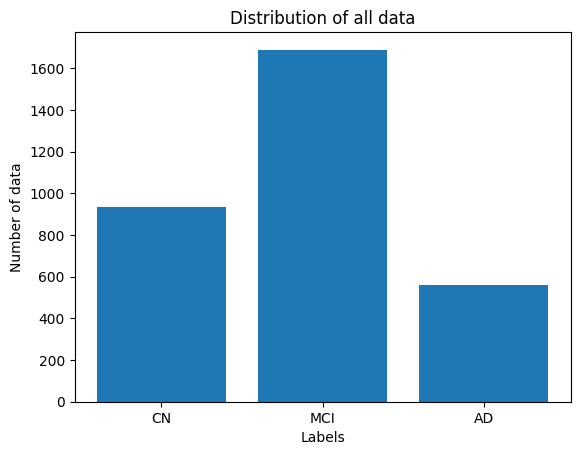

In [6]:
distribution = [len(['_'for label in label_list if label == i]) for i in range(len(LABELS))]
plt.bar(LABELS, distribution)
plt.xlabel('Labels')
plt.ylabel('Number of data')
plt.title('Distribution of all data')
plt.show()

In [9]:
label_list = tf.keras.utils.to_categorical(label_list, CLASSES)

## Partition data

In [10]:
partition = int(len(data_list) * 0.8)
cur_subject = csv_data[partition][1]
while csv_data[partition][1] == cur_subject:
    partition += 1

train_set, val_set = data_list[ : partition], data_list[partition : ]
train_label, val_label = label_list[ : partition], label_list[partition : ]

In [11]:
str_seed = 'final project'
np.random.seed(sum(str_seed.encode('ascii')))
div_slice = np.random.choice(train_set.shape[0], partition, replace = False)

np.random.shuffle(train_set)
np.random.shuffle(train_label)

In [12]:
# dataloader = []

# batch_num = math.floor(len(train_set) / BATCH_SIZE)
# for i in range(batch_num):
#     batch_data = train_set[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
#     batch_label = train_label[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
#     dataloader.append((batch_data, batch_label))
# if (train_set.shape[0] % BATCH_SIZE != 0):
#     batch_data = train_set[batch_num * BATCH_SIZE : ]
#     batch_label = train_label[batch_num * BATCH_SIZE : ]
#     dataloader.append((batch_data, batch_label))

## Train

In [13]:
_, HEIGTH, WIDTH, DEPTH = train_set.shape

model = models.Sequential()
model.add(
    layers.Conv3D(
        32, 
        (3, 3, 3), 
        activation = 'relu', 
        input_shape = (HEIGTH, WIDTH, DEPTH, 1),
    )
)
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(
    layers.Conv3D(
        64, 
        (3, 3, 3), 
        activation = 'relu',
    )
)
model.add(layers.MaxPooling3D((2, 2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(
    layers.Dense(
        16, 
        activation = 'relu'
    )
)
model.add(
    layers.Dense(
        CLASSES, 
        activation = 'softmax'
    )
)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 94, 94, 94, 32)    896       
                                                                 
 max_pooling3d (MaxPooling3  (None, 47, 47, 47, 32)    0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 45, 45, 45, 64)    55360     
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 22, 22, 22, 64)    0         
 g3D)                                                            
                                                                 
 flatten (Flatten)           (None, 681472)            0         
                                                                 
 dropout (Dropout)           (None, 681472)           

In [14]:
model.fit(
    train_set[:2000], 
    train_label[:2000 ],
    batch_size = BATCH_SIZE // 4,
    epochs = EPOCH,
    verbose = 2,
)

Epoch 1/20


63/63 - 272s - loss: 2.6386 - accuracy: 0.5145 - 272s/epoch - 4s/step
Epoch 2/20
63/63 - 267s - loss: 1.0712 - accuracy: 0.5290 - 267s/epoch - 4s/step
Epoch 3/20
63/63 - 267s - loss: 1.0507 - accuracy: 0.5295 - 267s/epoch - 4s/step
Epoch 4/20
63/63 - 273s - loss: 1.0326 - accuracy: 0.5285 - 273s/epoch - 4s/step
Epoch 5/20
63/63 - 277s - loss: 1.0185 - accuracy: 0.5300 - 277s/epoch - 4s/step
Epoch 6/20
63/63 - 286s - loss: 1.0018 - accuracy: 0.5315 - 286s/epoch - 5s/step
Epoch 7/20
63/63 - 293s - loss: 0.9793 - accuracy: 0.5410 - 293s/epoch - 5s/step
Epoch 8/20
63/63 - 284s - loss: 0.9574 - accuracy: 0.5390 - 284s/epoch - 5s/step
Epoch 9/20
63/63 - 280s - loss: 0.9291 - accuracy: 0.5600 - 280s/epoch - 4s/step
Epoch 10/20
63/63 - 283s - loss: 0.8909 - accuracy: 0.5725 - 283s/epoch - 4s/step
Epoch 11/20
63/63 - 282s - loss: 0.8494 - accuracy: 0.5770 - 282s/epoch - 4s/step
Epoch 12/20
63/63 - 274s - loss: 0.7884 - accuracy: 0.6120 - 274s/epoch - 4s/step
Epoch 13/20
63/63 - 275